<a href="https://colab.research.google.com/github/ogunjosam/ISIMIP_data/blob/main/ML_Onset_Cessation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
'''
!pip install pyyaml==5.4.1
!pip install darts
import darts

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, TCNModel
from darts.metrics import mape,rmse
from darts.utils.missing_values import fill_missing_values
'''

import matplotlib as mpl


mpl.style.use('classic')  #classic fivethirtyeight
mpl.rcParams['figure.facecolor'] = '1.0'

!git clone -l -s https://github.com/ogunjosam/ISIMIP_data.git

%cd ISIMIP_data
from pyESN import ESN

Cloning into 'ISIMIP_data'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 57 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.
/content/ISIMIP_data/ISIMIP_data/ISIMIP_data/ISIMIP_data


Let's define the Echo State Network

In [94]:
def echo_net(data):
  esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 250,
          spectral_radius = 0.20,
          teacher_scaling = 1.9,
          random_state=42)
  
  trainlen = 80
  future = 20
  pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

  prediction = esn.predict(np.ones(future))
  print("test error at "+ii+": "+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))
  rmse = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))

  return pred_training, prediction, rmse

Load data

test error at Badalabougou: 17.18618293761538
test error at Boumboum: 24.054628853586866
test error at Achouadene: 19.997839896594744
test error at Abadam: 22.42388440460373
test error at Abadji: 16.25658887389984
test error at Chandjone: 15.39694192128232
test error at Los: 20.103897791205508
test error at Bakao: 20.21620849322611


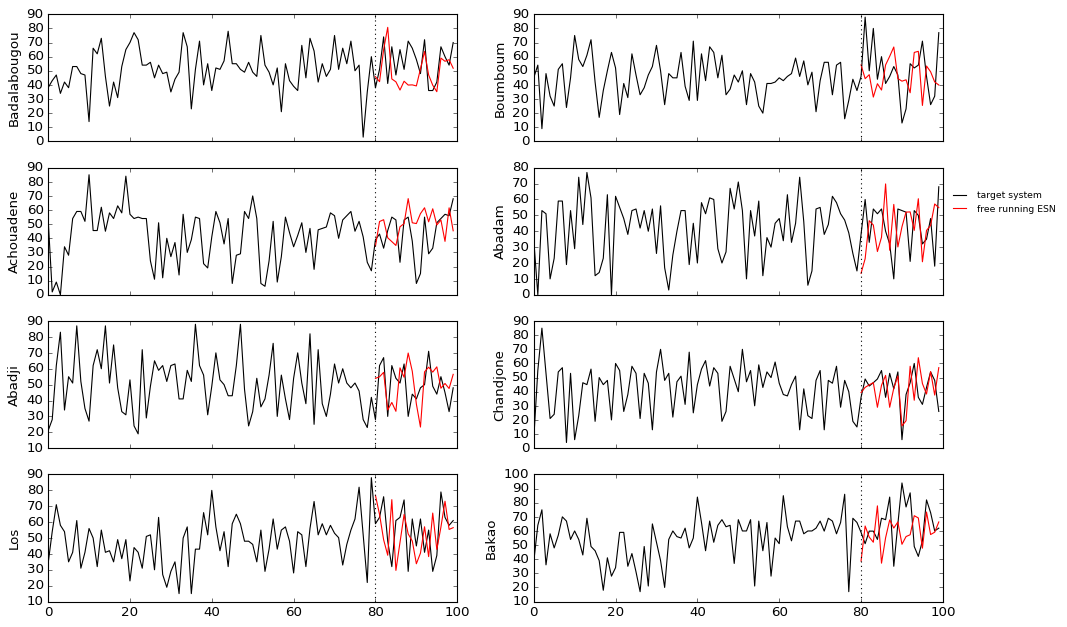

In [95]:
fig,ax = plt.subplots(4,2,figsize=(12,8),sharex=True)
fig.subplots_adjust(hspace=8.0,wspace=0.0)
plt.tight_layout(h_pad=1,w_pad=3)
axf = ax.flatten()

xx = pd.read_excel('https://github.com/ogunjosam/ISIMIP_data/blob/main/onset_data.xlsx?raw=true')
xx

trainlen, future = 80, 20
for i, ii in enumerate(list(xx)[1:]):
  xx[ii].fillna(int(xx[ii].mean()),inplace=True)
  a,b,c = echo_net(xx[ii].values)
  axf[i].plot(range(0,trainlen+future),xx[ii][0:trainlen+future],'k',label="target system")
  axf[i].plot(range(trainlen,trainlen+future),b,'r', label="free running ESN")
  lo,hi = axf[i].set_ylim()
  axf[i].plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
  axf[i].set_ylabel(ii)

axf[3].legend(loc=(1.01,0.61),fontsize='x-small',frameon=False)


Cessation of rainfall modelling

test error at Badalabougou: 9.49755944447597
test error at Boumboum: 16.841064921205028
test error at Achouadene: 16.89493035933766
test error at Abadam: 13.064318847621353
test error at Abadji: 8.868375335978632
test error at Chandjone: 17.35910318107724
test error at Los: 12.968360554518165
test error at Bakao: 19.093519930391597


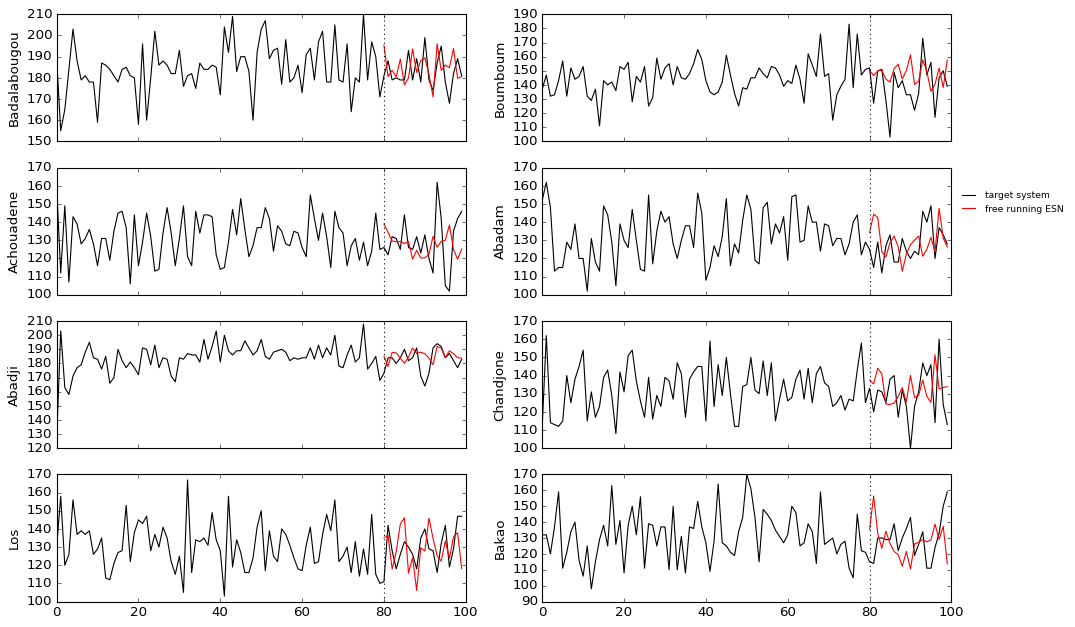

In [96]:
fig,ax = plt.subplots(4,2,figsize=(12,8),sharex=True)
fig.subplots_adjust(hspace=8.0,wspace=0.0)
plt.tight_layout(h_pad=1,w_pad=3)
axf = ax.flatten()

xx = pd.read_excel('https://github.com/ogunjosam/ISIMIP_data/blob/main/reces_data.xlsx?raw=true')
xx

trainlen, future = 80, 20
for i, ii in enumerate(list(xx)[1:]):
  xx[ii].fillna(int(xx[ii].mean()),inplace=True)
  a,b,c = echo_net(xx[ii].values)
  axf[i].plot(range(0,trainlen+future),xx[ii][0:trainlen+future],'k',label="target system")
  axf[i].plot(range(trainlen,trainlen+future),b,'r', label="free running ESN")
  lo,hi = axf[i].set_ylim()
  axf[i].plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
  axf[i].set_ylabel(ii)

axf[3].legend(loc=(1.01,0.61),fontsize='x-small',frameon=False)


Echo State Network with lag

In [259]:
def echo_net_lag(data,lag):
  esn = ESN(n_inputs = 2,
          n_outputs = 1,
          n_reservoir = 200,
          spectral_radius = 0.7,
          sparsity = 0.95,
          teacher_forcing = True,
          teacher_scaling = 1.9,
          random_state=42)
  
  trainlen = 80
  future = 20
  
  kk = np.column_stack([np.ones((trainlen)),np.roll(data[:trainlen],lag)])
  
  pred_training = esn.fit(kk,data[:trainlen])
  #pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

  prediction = esn.predict(np.column_stack([np.ones((future)),data[trainlen:]]))
  #print("test error at "+ii+str(lag)+": "+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))
  rmse = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))

  return rmse

Analysis rainfall onset with lag

[647.9365785733033, 53]
[498.89635917669574, 32]
[340.560019350923, 42]
[597.4769952796069, 20]
[21.940943739404847, 46]
[647.0447882526202, 19]
[751.8996810667829, 25]
[760.0131120436541, 20]


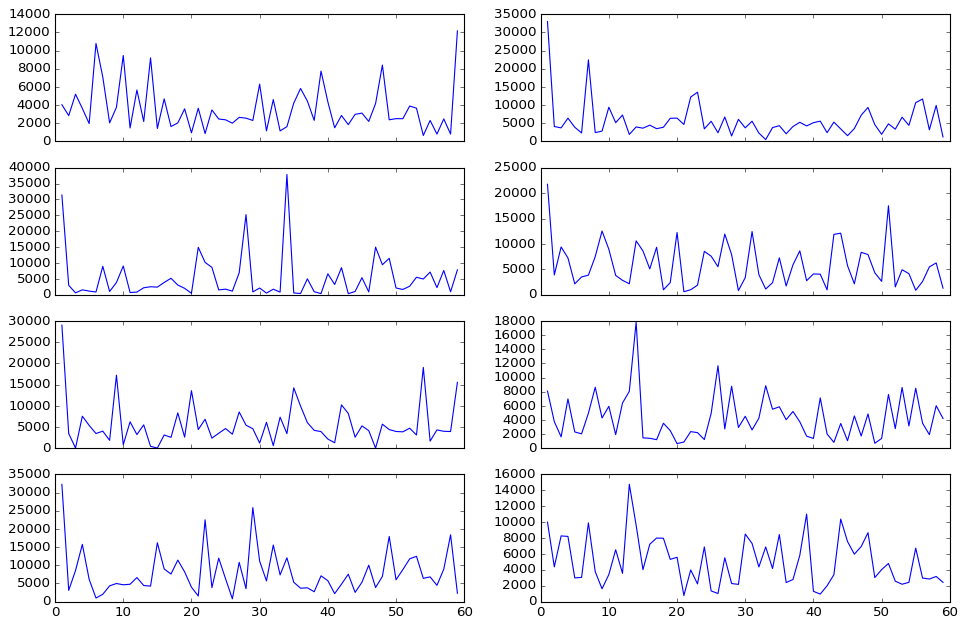

In [260]:
fig,ax = plt.subplots(4,2,figsize=(12,8),sharex=True)
fig.subplots_adjust(hspace=8.0,wspace=0.0)
plt.tight_layout(h_pad=1,w_pad=3)
axf = ax.flatten()

np.arange(-10,0)
xx = pd.read_excel('https://github.com/ogunjosam/ISIMIP_data/blob/main/onset_data.xlsx?raw=true')
xx

trainlen, future = 80, 20
for i, ii in enumerate(list(xx)[1:]):
  xx[ii].fillna(int(xx[ii].mean()),inplace=True)
  vv = []
  for j in np.arange(1,60):
    vv.append(echo_net_lag(xx[ii].values,j))
  
  #print(vv)
  axf[i].plot(np.arange(1,60),vv)
  print([np.min(vv),np.argmin(vv)])




In [215]:
rng = np.random.RandomState(42)
def frequency_generator(N,min_period,max_period,n_changepoints):
    """returns a random step function with N changepoints
       and a sine wave signal that changes its frequency at
       each such step, in the limits given by min_ and max_period."""
    # vector of random indices < N, padded with 0 and N at the ends:
    changepoints = np.insert(np.sort(rng.randint(0,N,n_changepoints)),[0,n_changepoints],[0,N])
    # list of interval boundaries between which the control sequence should be constant:
    const_intervals = list(zip(changepoints,np.roll(changepoints,-1)))[:-1]
    # populate a control sequence
    frequency_control = np.zeros((N,1))
    for (t0,t1) in const_intervals:
        frequency_control[t0:t1] = rng.rand()
    periods = frequency_control * (max_period - min_period) + max_period
    # run time through a sine, while changing the period length
    frequency_output = np.zeros((N,1))
    z = 0
    for i in range(N):
        z = z + 2 * np.pi / periods[i]
        frequency_output[i] = (np.sin(z) + 1)/2
    return np.hstack([np.ones((N,1)),1-frequency_control]),frequency_output


N = 15000 # signal length
min_period = 2
max_period = 10
n_changepoints = int(N/200)
frequency_control,frequency_output = frequency_generator(N,min_period,max_period,n_changepoints)

traintest_cutoff = int(np.ceil(0.7*N))

train_ctrl,train_output = frequency_control[:traintest_cutoff],frequency_output[:traintest_cutoff]
test_ctrl, test_output  = frequency_control[traintest_cutoff:],frequency_output[traintest_cutoff:]

array([[1.        , 0.47726717],
       [1.        , 0.47726717],
       [1.        , 0.47726717],
       ...,
       [1.        , 0.81342994],
       [1.        , 0.81342994],
       [1.        , 0.81342994]])